In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

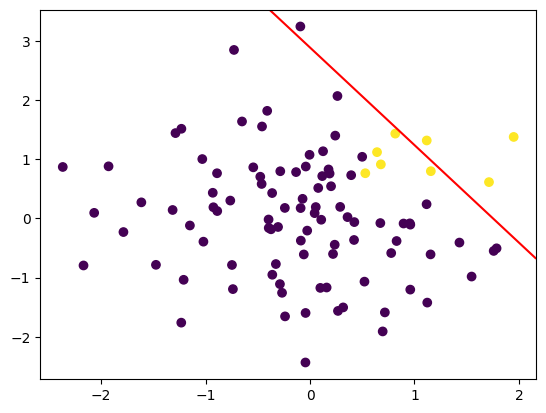

In [2]:
# 데이터 생성

X = torch.randn(100, 2) # X1과 X2를 두 축으로 한 좌표평면에 점 (X1, X2)를 표현하면, 그냥 랜덤한 점 100개가 됨
y = ((X[:, 0] > 0.5) & (X[:, 1] > 0.5)).float() # X1과 X2가 모두 0.5 초과인 행의 경우에 1, 아니면 0

# model 만들기

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        outputs = self.linear(x)
        
        return F.sigmoid(outputs)
    
model = LogisticRegression(input_dim=2, output_dim=1)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training

for epoch in range(1000):
    y_pred = model(X)
    
    loss = criterion(y_pred.squeeze(), y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
# 시각화

plt.scatter(X[:, 0], X[:, 1], c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

Z = model(torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)).detach().numpy() # Z.shape: (10000, 1)
    # xx1.ravel().shape: (10000,)
    # np.c_[xx1.ravel(), xx2.ravel()].shape: (10000, 2)

Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, levels=[0.5], colors="r") # 등고선

plt.show()